In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
gastos_publicos = pd.read_excel('imf_government_expenditure.xls')

In [4]:
print(egdi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             193 non-null    int64  
 1   Country Name                            193 non-null    object 
 2   E-Government Rank                       193 non-null    int64  
 3   E-Government Index                      193 non-null    float64
 4   E-Participation Index                   193 non-null    float64
 5   Online Service Index                    193 non-null    float64
 6   Human Capital Index                     193 non-null    float64
 7   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ KB
None


In [5]:
print(gastos_publicos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     151 non-null    object 
 1   Percentage  151 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB
None


In [6]:
print(egdi['Country Name'].value_counts().sum())
print(gastos_publicos['Country'].value_counts().sum())

193
151


In [7]:
set(gastos_publicos['Country']).difference(egdi['Country Name'])

{'Aruba',
 "China, People's Republic of",
 'Georgia',
 'Hong Kong SAR',
 'Iran',
 'Korea, Republic of',
 'Kyrgyz Republic',
 'Micronesia, Fed. States of',
 'Moldova',
 'Republic of Congo',
 'Slovak Republic',
 'Tanzania',
 'Türkiye, Republic of',
 'United Kingdom',
 'United States',
 'Vietnam'}

In [8]:
gastos_publicos['Country'] = gastos_publicos['Country'].replace({
    'Georgia': 'Georgia (Country)',
    'Iran': 'Iran (Islamic Republic of)',
    'Micronesia, Fed. States of': 'Micronesia (Federated States of)',
    'Moldova': 'Republic of Moldova',
    'Korea, Republic of': 'Republic of Korea',
    'Tanzania': 'United Republic of Tanzania',
    'Slovak Republic': 'Slovakia',
    'Türkiye, Republic of': 'Türkiye',
    'Republic of Congo': 'Congo',
    "China, People's Republic of": "China",
    'Kyrgyz Republic': 'Kyrgyzstan',
    'United States': 'United States of America',
    'Vietnam': 'Viet Nam',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland'
})

In [9]:
set(gastos_publicos['Country']).difference(egdi['Country Name'])

{'Aruba', 'Hong Kong SAR'}

In [10]:
gastos_publicos = gastos_publicos[gastos_publicos['Country'].isin(egdi['Country Name'])].sort_values(by='Country').reset_index(drop=True)

In [11]:
gastos_publicos['Country'].value_counts().sum()

np.int64(149)

In [12]:
egdi = egdi[egdi['Country Name'].isin(gastos_publicos['Country'])].sort_values(by='Country Name').reset_index(drop=True)

In [13]:
egdi['Country Name'].value_counts().sum()

np.int64(149)

In [14]:
egdi = egdi.drop(columns={
    'E-Government Rank', 
    'Survey Year'
})

In [15]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            149 non-null    object 
 1   E-Government Index                      149 non-null    float64
 2   E-Participation Index                   149 non-null    float64
 3   Online Service Index                    149 non-null    float64
 4   Human Capital Index                     149 non-null    float64
 5   Telecommunication Infrastructure Index  149 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.1+ KB


In [16]:
df = pd.merge(egdi, gastos_publicos, left_on='Country Name', right_on='Country')

In [17]:
df.head()

,Country Name,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index,Country,Percentage
0,Albania,0.80000,0.7260,0.81441,0.81059,0.77497,Albania,30.444901
1,Algeria,0.59556,0.0548,0.33200,0.64179,0.81290,Algeria,32.699300
2,Angola,0.41487,0.2192,0.39624,0.47602,0.37238,Angola,19.510293
3,Antigua and Barbuda,0.64282,0.3425,0.41658,0.71757,0.79426,Antigua and Barbuda,20.692064
4,Argentina,0.85733,0.6301,0.79649,0.93298,0.84254,Argentina,37.714727


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            149 non-null    object 
 1   E-Government Index                      149 non-null    float64
 2   E-Participation Index                   149 non-null    float64
 3   Online Service Index                    149 non-null    float64
 4   Human Capital Index                     149 non-null    float64
 5   Telecommunication Infrastructure Index  149 non-null    float64
 6   Country                                 149 non-null    object 
 7   Percentage                              149 non-null    float64
dtypes: float64(6), object(2)
memory usage: 9.4+ KB


In [19]:
df = df.drop(columns={
    'Country',
    'Country Name'
})

In [20]:
df.head()

,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index,Percentage
0,0.80000,0.7260,0.81441,0.81059,0.77497,30.444901
1,0.59556,0.0548,0.33200,0.64179,0.81290,32.699300
2,0.41487,0.2192,0.39624,0.47602,0.37238,19.510293
3,0.64282,0.3425,0.41658,0.71757,0.79426,20.692064
4,0.85733,0.6301,0.79649,0.93298,0.84254,37.714727


In [21]:
corr_df = pd.DataFrame({
    'EGDI x Gastos Públicos': df['Percentage'].corr(df['E-Government Index'], method='spearman'),
    'EPI x Gastos Públicos': df['Percentage'].corr(df['E-Participation Index'], method='spearman'),
    'OSI x Gastos Públicos': df['Percentage'].corr(df['Online Service Index'], method='spearman'),
    'HCI x Gastos Públicos': df['Percentage'].corr(df['Human Capital Index'], method='spearman'),
    'TII x Gastos Públicos': df['Percentage'].corr(df['Telecommunication Infrastructure Index'], method='spearman')
}, range(1))

In [22]:
corr_df.head()

,EGDI x Gastos Públicos,EPI x Gastos Públicos,OSI x Gastos Públicos,HCI x Gastos Públicos,TII x Gastos Públicos
0,0.53495,0.443837,0.452726,0.598676,0.462463


In [23]:
corr_df = corr_df.melt(
    value_vars=[
        'EGDI x Gastos Públicos',
        'EPI x Gastos Públicos',
        'OSI x Gastos Públicos',
        'HCI x Gastos Públicos',
        'TII x Gastos Públicos'
    ],
    var_name='Comparacao', 
    value_name='Coeficiente_Correlacao'
)

In [24]:
corr_df.head()

,Comparacao,Coeficiente_Correlacao
0,EGDI x Gastos Públicos,0.534950
1,EPI x Gastos Públicos,0.443837
2,OSI x Gastos Públicos,0.452726
3,HCI x Gastos Públicos,0.598676
4,TII x Gastos Públicos,0.462463


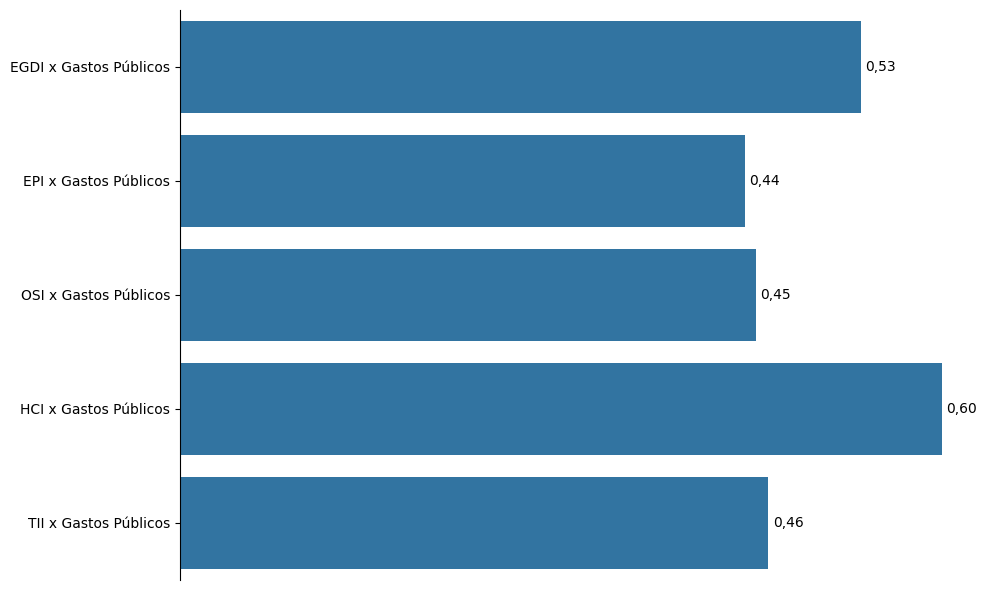

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_container = sns.barplot(corr_df, x='Coeficiente_Correlacao', y='Comparacao')

ax.bar_label(bar_container.containers[0], fmt=lambda x: f'{x:.2f}'.replace('.', ','), label_type='edge', padding=3)
sns.despine(bottom=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_visible(False)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/correlacao_egdi_gastospublicos.png', dpi=300, bbox_inches='tight')
plt.show()